<a href="https://colab.research.google.com/github/ARJUNVIJAYMK/ML-DL_assignment/blob/my_sql_assignment/ARJUNVIJAY_of_ML_Regression_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance Claims Charges Prediction

Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-01-06 15:55:10--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.007s  

2024-01-06 15:55:10 (8.05 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [ ]:
#import basic libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [ ]:
#Read the Data
insurance = pd.read_csv('insurance.csv')

##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
print(f'Top 5 of the insurance\n',insurance.head())
print(f"\nTotal rows and colums = ",insurance.shape)
print(f'\n',insurance.dtypes)


Top 5 of the insurance
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Total rows and colums =  (1338, 7)

 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Null check
null_values = insurance.isnull().sum()
null_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Visualizations

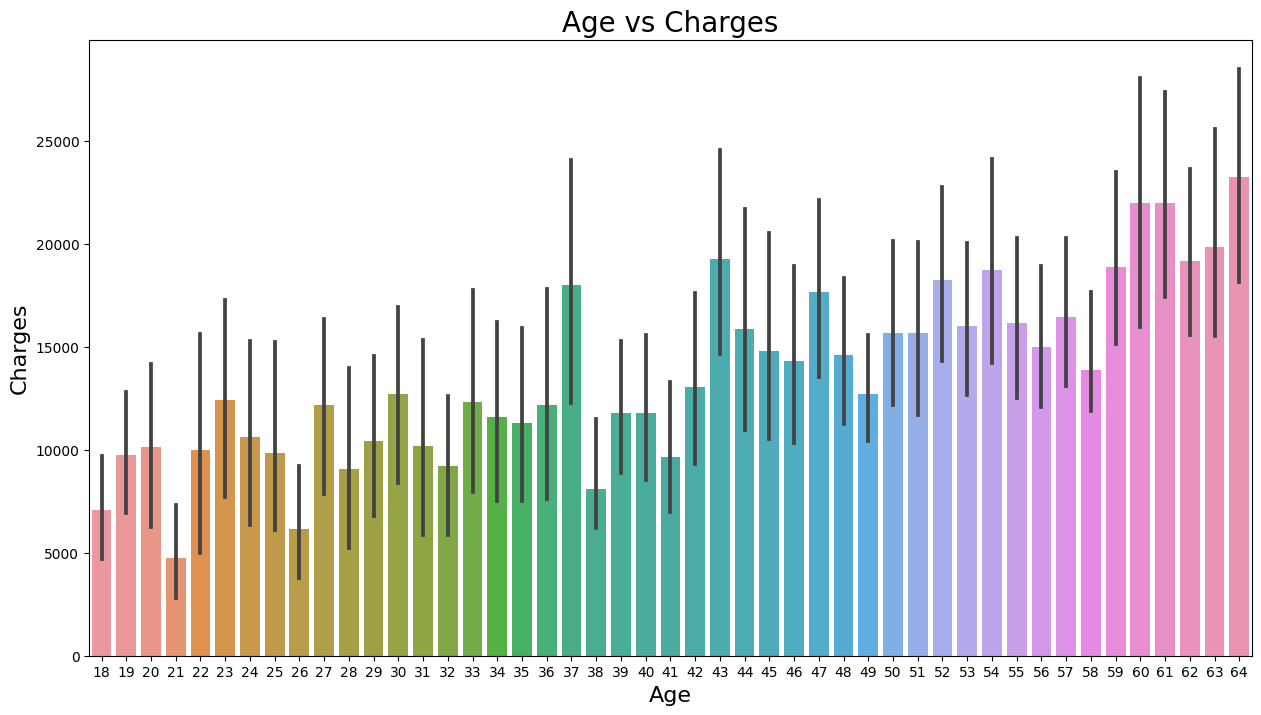

In [ ]:
# Age vs Charges
plt.figure(figsize=(15,8))
sns.barplot(x='age',y='charges',data = insurance)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Age vs Charges",fontsize = 20)
plt.show()
# the more the age the more will be insurance charge

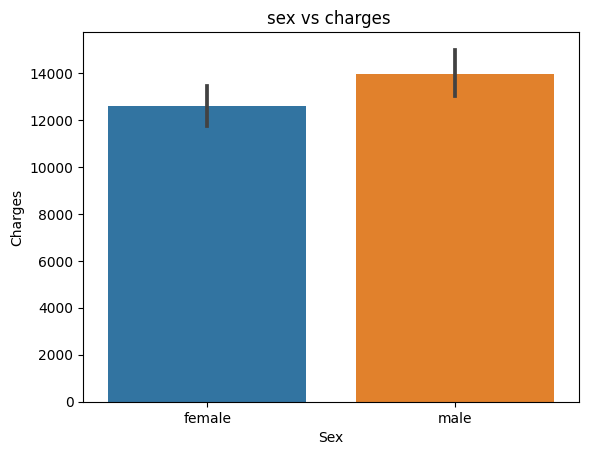

In [ ]:
 # sex vs charges
sns.barplot(x='sex',y ='charges',data=insurance)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('sex vs charges ')
plt.show()
# males insurance charges more than females.

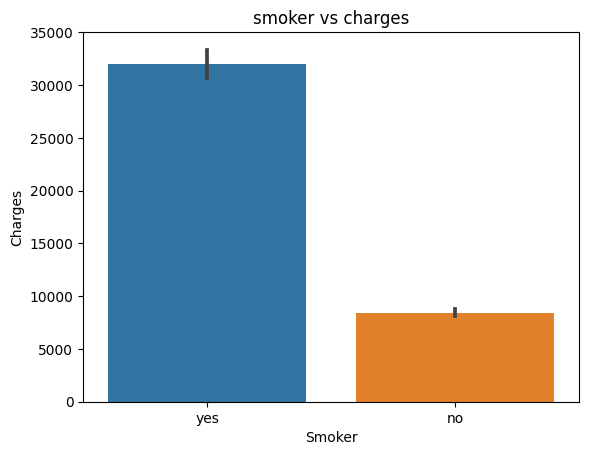

In [ ]:
# smoker vs charges
sns.barplot(x='smoker',y ='charges',data=insurance)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('smoker vs charges')
plt.show()
# smokers have more insurance charges than the non smokers

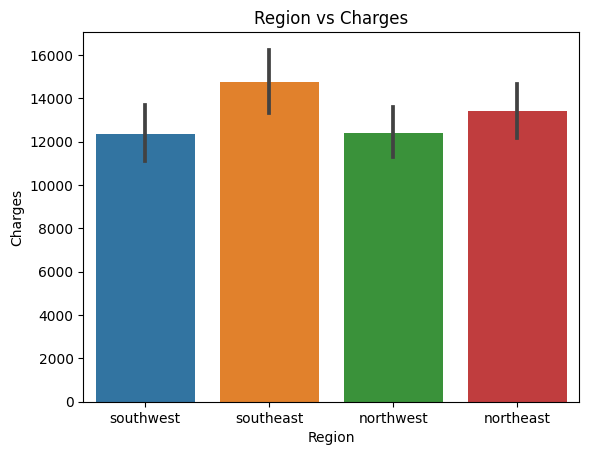

In [ ]:
# region vs charges
sns.barplot(x='region',y ='charges',data=insurance)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')
plt.show()
# region actually does not play any role in determining the insurance charges

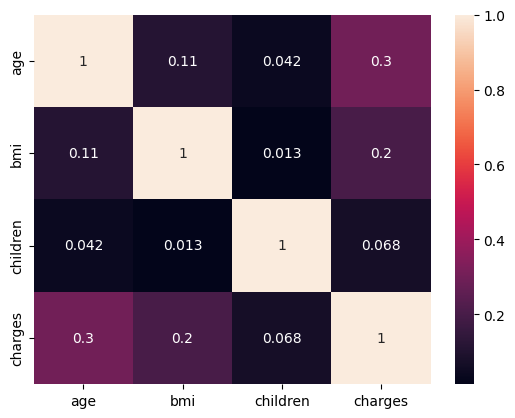

In [ ]:

# plotting the correlation plot for the dataset
corr_matrix=insurance.corr()
corr_matrix
sns.heatmap(corr_matrix, annot= True)
plt.show()

##STEP-3:Data Preprocessing / Clean the Data


In [ ]:
# removing unnecassary columns from the dataset
insurance =insurance.drop('region',axis = 1)
print(insurance.shape)
insurance.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [ ]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder

#Creating a labelencoder
le = LabelEncoder()

#Label encoding for sex
insurance['sex'] =le.fit_transform(insurance['sex'])
#Label encoding for smoker
insurance['smoker'] =le.fit_transform(insurance['smoker'])


In [ ]:
insurance['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [ ]:
insurance['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables
X =insurance.drop(columns=['charges'])
y=insurance['charges']

In [ ]:
print(X.shape)
X.sample(5)

(1338, 5)


,age,sex,bmi,children,smoker
1048,25,0,22.515,1,0
1062,59,1,41.140,1,1
180,58,1,28.595,0,0
592,20,1,31.130,2,0
929,41,1,34.210,1,0


In [ ]:
print(y.shape)
y.sample(5)

(1338,)


837    11657.71890
911    33732.68670
349     1635.73365
218     3392.97680
664    27037.91410
Name: charges, dtype: float64

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train ,y_test =train_test_split(X,y, test_size =0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

from math import sqrt

# creating the model
lrmodel = LinearRegression()

# feeding the training data to the model
lrmodel.fit(X_train,y_train)

# predicting the test set results
y_pred = lrmodel.predict(X_test)
# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("Mean squared error :",MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared error :",RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :',R2)

Mean squared error : 42267112.46653721
Root mean squared error : 6501.316210317508
R2 : 0.7461598589354325


##Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# creating the model
svrmodel = SVR()

# feeding the training data to the model
svrmodel.fit(X_train,y_train)

# predicting the test set results
y_pred = svrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("Mean squared error :",MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared error :",RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :',R2)

Mean squared error : 196331495.46004525
Root mean squared error : 14011.83412191442
R2 : -0.17909200782170998


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
dtrmodel = DecisionTreeRegressor()

# feeding the training data to the model
dtrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = dtrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("Mean squared error :",MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared error :",RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :',R2)

Mean squared error : 44037265.75169356
Root mean squared error : 6636.057997915145
R2 : 0.7355289941001368


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
rfrmodel = RandomForestRegressor()

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("Mean squared error :",MSE)

# Calculating the root mean squared error
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared error :",RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R2 :',R2)

Mean squared error : 28508063.163584433
Root mean squared error : 5339.294257070351
R2 : 0.8287914562261383


Compare and evaluate the Model results and find the best model

In [ ]:
import sklearn.model_selection
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear'))]
best_model = None
best_avg_mse = float('inf')

for model_name, model in models:
    cv_scores = sklearn.model_selection.cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    avg_mse = -cv_scores.mean()  # Take the negative because cross_val_score returns neg_mean_squared_error
    print(f"{model_name} - Average MSE: {avg_mse}")

    if avg_mse < best_avg_mse:
       best_avg_mse = avg_mse
       best_model = model_name

print(f"\nBest Model: {best_model} with Average MSE: {best_avg_mse}")

Linear Regression - Average MSE: 36953511.981502585
Decision Tree - Average MSE: 42882305.55744849
Random Forest - Average MSE: 25257201.0070525
Support Vector Machine - Average MSE: 166322559.76076663

Best Model: Random Forest with Average MSE: 25257201.0070525
